In [44]:
import pandas as pd
import numpy as np
import ast
from scipy.stats import ttest_ind, chisquare
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("expo-res-full.csv", sep="|")
df["stepsA"] = df["stepsA"].apply(lambda x : ast.literal_eval(x))
df["stepsB"] = df["stepsB"].apply(lambda x : ast.literal_eval(x))

In [46]:
df = df.sort_values(by=["expoFirst"])
df.head()
df.shape

(60, 11)

In [41]:
def drop(x):
    if all(i < 100 for i in x["stepsA"]) and all(i < 100 for i in x["stepsB"]):
        return 0
    return 1
df["drop"] = df.apply(drop, axis=1)

In [42]:
df = df[df["drop"] != 1]
df["expectationwhy"]

29    Condition B had a tendency to swing wildly and...
24                                      yes very useful
58          The expectations differed to me each round.
30    They both were well behaved at times and not o...
34                       They were both about the same.
35                        Didn't notice any differences
37    The amount that changed seemed to be better an...
38                                 It worked out better
39    I really couldn't make a lot of sense out of e...
41                        It was hard to see a pattern.
43    B was helpful, but not as much as A, and B was...
47                                        stayed stable
49    That explanation makes more sense with how I p...
53    i think they both did equally a good job overa...
55                     Condition B was more consistent.
20    Both seemed to match my expectations about the...
59    It seemed to fluctuate, and I didn't feel one ...
7     I also thought it was condition A. This wa

In [47]:
df.shape

(60, 11)

In [48]:
def expo_steps(x):
    if x["expoFirst"]:
        return x["stepsA"]
    else: 
        return x["stepsB"]
def norm_steps(x):
    if x["expoFirst"]:
        return x["stepsB"]
    else: 
        return x["stepsA"]

In [49]:
df["expoSteps"] = df.apply(expo_steps, axis=1)
df["normalSteps"] = df.apply(norm_steps, axis=1)

In [50]:
expo = df["expoSteps"].sum()
norm = df["normalSteps"].sum()
print(np.average(expo), np.average(norm))
print(ttest_ind(expo, norm))

12.132890365448505 15.44
Ttest_indResult(statistic=-1.3738534290750153, pvalue=0.17000108214281864)


(array([287.,   9.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  40.6,  80.2, 119.8, 159.4, 199. , 238.6, 278.2, 317.8,
        357.4, 397. ]),
 <a list of 10 Patch objects>)

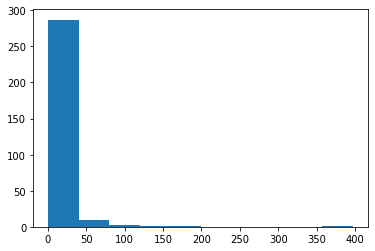

In [51]:
plt.hist(expo)

(array([268.,  17.,   8.,   1.,   1.,   0.,   3.,   1.,   0.,   1.]),
 array([  1. ,  27.5,  54. ,  80.5, 107. , 133.5, 160. , 186.5, 213. ,
        239.5, 266. ]),
 <a list of 10 Patch objects>)

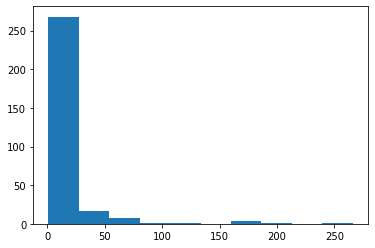

In [52]:
plt.hist(norm)

In [27]:
def agree_exp(x):
    if not x["expoFirst"] and x["expectationbinary"] == -1: 
        return 1
    if x["expoFirst"] and x["expectationbinary"] == 1:
        return 1
    if x["expectationbinary"] == 0:
        return 0
    return -1

def agree_use(x):
    if not x["expoFirst"] and x["usefulBinary"] == -1: 
        return 1
    if x["expoFirst"] and x["usefulBinary"] == 1:
        return 1
    if x["usefulBinary"] == 0:
        return 0
    return -1

In [28]:
df["expAgree"] = df.apply(agree_exp, axis=1)
df["useAgree"] = df.apply(agree_use, axis=1)

In [29]:
exp = list(df["expAgree"].value_counts())
use = list(df["useAgree"].value_counts())
print(exp, use)

[25, 17, 11] [27, 15, 11]


In [30]:
chisquare(exp)

Power_divergenceResult(statistic=5.584905660377357, pvalue=0.06127074272286635)

In [31]:
chisquare(use)

Power_divergenceResult(statistic=7.849056603773584, pvalue=0.01975145139685507)